<a href="https://colab.research.google.com/github/gspandhana/MachineLearning/blob/main/P8_ModelSelectionUsingValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/data

/content/drive/My Drive/Colab Notebooks/data


In [ ]:
# Read the file "dataset.csv" as a Pandas dataframe
df = pd.read_csv("dataset.csv")

# Take a quick look at the dataset
df.head()


,x,y
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [ ]:
# Assign the values of the x and y column values to the
# predictor and response variables
x = df[['x']].values
y = df.y.values

In [ ]:
# Split the dataset into train and validation sets with 75% training set
# Set random_state=1
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state = 1 )


Computing the train and validation error in terms of MSE

In [ ]:
# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 10

# Create two empty lists to store training and validation MSEs
training_error, validation_error = [],[]

# Loop through the degrees of the polynomial to create different models
for d in range(1, maxdeg+1):

    # Compute the polynomial features for the current degree
    # for the train set
    x_poly_train = PolynomialFeatures(degree = d).fit_transform(x_train)

    # Compute the polynomial features for the validation set
    x_poly_val = PolynomialFeatures(degree = d).fit_transform(x_val)

    # Initialize a linear regression model,
    # Note: Sklearn's PolynomialFeatures adds a bias column by default.
    # Set fit_intercept = False when initializing the linear regression
    # model to avoid having 2 intercepts.
    lreg = LinearRegression(fit_intercept=False)

    # Fit the model on the train data
    lreg.fit(x_poly_train, y_train)

    # Use the trained model to predict on the transformed train data
    y_train_pred = lreg.predict(x_poly_train)

    # Use the trained model to predict on the transformed validation data
    y_val_pred = lreg.predict(x_poly_val)

    # Compute the MSE on the train predictions
    training_error.append(mean_squared_error(y_train, y_train_pred))

    # Compute the MSE on the validation predictions
    validation_error.append(mean_squared_error(y_val, y_val_pred))

In [ ]:
# Helper code to compute the best degree, which is the model
# with the lowest validation error
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)

# Print the degree of the best model computed above
print("The best degree of the model is",best_degree)

The best degree of the model is 1


Plotting the error graph

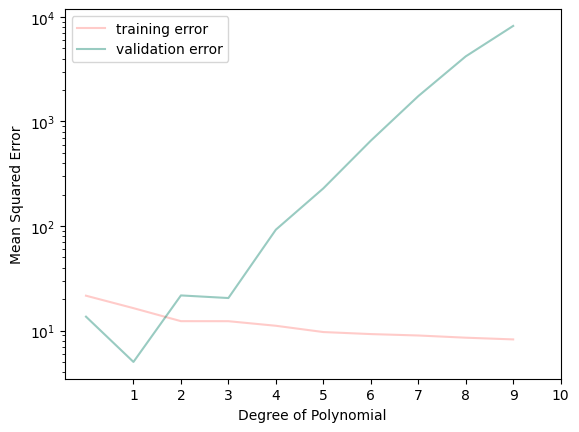

In [ ]:
# Plot the errors as a function of increasing d value to visualise the training
# and testing errors
fig, ax = plt.subplots()

# Plot the training error with labels
ax.plot(training_error, color='#FF7E79', alpha=0.4, label = 'training error')

# Plot the validation error with labels
ax.plot(validation_error, color='#007D66', alpha=0.4, label = 'validation error')

# Set the plot labels and legends
ax.set_xlabel('Degree of Polynomial')
ax.set_xticks(range(1, maxdeg+1))
ax.set_ylabel('Mean Squared Error')
ax.legend(loc = 'best')
ax.set_yscale('log')
plt.show();